<a href="https://colab.research.google.com/github/fredicia/datamba/blob/classification/Classification_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Connect to Google Drive for Data
from google.colab import drive
drive.mount ("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas.util.testing as tm
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm #support vector Machine
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
#Load Data
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data/Titanic.csv')

In [ ]:
#Check information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dataset.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent_1 = dataset.isnull().sum()/dataset.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [ ]:
#Result: Some feature have missing value(need to imputation) , 
#need to convert object types to numeric,
#and remove the column that not have relevant with classification.
# Data Preprocessing

#Remove 'Cabin' feature because it has complicated value and miss 687 data
dataset.drop('Cabin', axis=1, inplace=True)

#Remove 'Ticket' feature because it has 681 unique data from 891 data
dataset.drop('Ticket', axis=1, inplace=True)

#complete missing age values with median
dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

#complete embarked with mode
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

#complete missing fare with median
dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

#Fill Empty 'Embarked' feature and convert to categorical numeric
dataset.Embarked[dataset.Embarked == 'S'] = 1
dataset.Embarked[dataset.Embarked == 'C'] = 2
dataset.Embarked[dataset.Embarked == 'Q'] = 3

#Convert 'Sex' to Numeric type
dataset.Sex[dataset.Sex == 'male'] = 1
dataset.Sex[dataset.Sex == 'female'] = 2

#Convert 'Age' and 'Fare' to Categorical Numeric
#dataset['AgeGroup'] = pd.cut(dataset['Age'], [0, 2, 11, 20, 61, 101], labels=[1,2,3,4,5])
#dataset['FareGroup'] = pd.qcut(dataset['Fare'], q=4, labels=[1,2,3,4])

#Join 'SibSp' dan 'Parch' feature to know family Size
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
dataset['Alone'] = 1
dataset['Alone'][dataset['FamilySize'] > 0] = 0

#Remove 'Age', 'Fare', 'SibSp', 'Parch'
#dataset.drop('Age', axis = 1, inplace= True)
#dataset.drop('Fare', axis = 1, inplace= True)
dataset.drop('SibSp', axis = 1, inplace= True)
dataset.drop('Parch', axis = 1, inplace= True)
dataset.drop('Name', axis = 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
dataset.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Alone
0,1,0,3,1,22.0,7.2500,1,1,0
1,2,1,1,2,38.0,71.2833,2,1,0
2,3,1,3,2,26.0,7.9250,1,0,1
3,4,1,1,2,35.0,53.1000,1,1,0
4,5,0,3,1,35.0,8.0500,1,0,1
5,6,0,3,1,28.0,8.4583,3,0,1
6,7,0,1,1,54.0,51.8625,1,0,1
7,8,0,3,1,2.0,21.0750,1,4,0
8,9,1,3,2,27.0,11.1333,1,2,0
9,10,1,2,2,14.0,30.0708,2,1,0


In [ ]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Alone
PassengerId,1.000000,-0.005007,-0.035144,0.034212,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.064910,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.339898,-0.549500,0.065997,0.135207
Age,0.034212,-0.064910,-0.339898,1.000000,0.096688,-0.245619,0.171647
Fare,0.012658,0.257307,-0.549500,0.096688,1.000000,0.217138,-0.271832
FamilySize,-0.040143,0.016639,0.065997,-0.245619,0.217138,1.000000,-0.690922
Alone,0.057462,-0.203367,0.135207,0.171647,-0.271832,-0.690922,1.000000


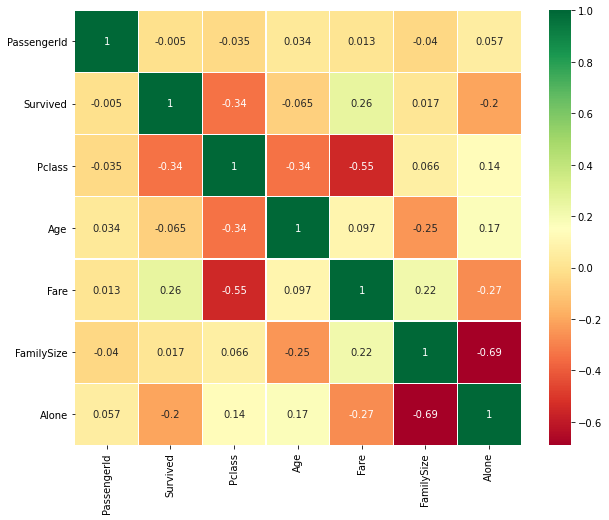

In [ ]:
#Check Correlation
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
feature_col = ['Pclass','Age','Fare','FamilySize','Alone']
X = dataset[feature_col]
Y = dataset['Survived']

In [ ]:
X

,Pclass,Age,Fare,FamilySize,Alone
0,3,22.0,7.2500,1,0
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,0,1
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,0,1
888,3,28.0,23.4500,3,0
889,1,26.0,30.0000,0,1


In [ ]:
xtrain_ds, xtest_ds, ytrain_ds, ytest_ds = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain_ds, ytrain_ds)
pred_rf = rf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_rf))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       110
           1       0.65      0.62      0.64        69

    accuracy                           0.73       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.73      0.73       179



In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(xtrain_ds, ytrain_ds)
pred_dectree = decision_tree.predict(xtest_ds) 
print(classification_report(ytest_ds, pred_dectree))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       110
           1       0.53      0.51      0.52        69

    accuracy                           0.64       179
   macro avg       0.61      0.61      0.61       179
weighted avg       0.63      0.64      0.64       179



In [ ]:
svc_clf = SVC(kernel='rbf',C=1,gamma=0.1) 
svc_clf.fit(xtrain_ds, ytrain_ds)
pred_svc = svc_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_svc))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       110
           1       0.73      0.39      0.51        69

    accuracy                           0.71       179
   macro avg       0.72      0.65      0.65       179
weighted avg       0.71      0.71      0.68       179



In [ ]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(xtrain_ds, ytrain_ds)
pred_linsvc = linsvc_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_linsvc))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       110
           1       0.78      0.45      0.57        69

    accuracy                           0.74       179
   macro avg       0.75      0.68      0.69       179
weighted avg       0.75      0.74      0.72       179



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
logreg_clf = LogisticRegression()
logreg_clf.fit(xtrain_ds, ytrain_ds)
pred_logreg = logreg_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_logreg))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       110
           1       0.75      0.55      0.63        69

    accuracy                           0.75       179
   macro avg       0.75      0.72      0.72       179
weighted avg       0.75      0.75      0.75       179



In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(xtrain_ds, ytrain_ds)
pred_knn = knn_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       110
           1       0.65      0.58      0.61        69

    accuracy                           0.72       179
   macro avg       0.70      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



In [ ]:
gnb_clf = GaussianNB()
gnb_clf.fit(xtrain_ds, ytrain_ds)
pred_gnb = gnb_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_gnb))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81       110
           1       0.81      0.42      0.55        69

    accuracy                           0.74       179
   macro avg       0.76      0.68      0.68       179
weighted avg       0.75      0.74      0.71       179

